# Smoothing DEA FC data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd 
from scipy.signal import savgol_filter

# To Create a Report from: 
from docx import Document
from docx.shared import Inches

In [2]:
files = [i.split('.')[0] for i in os.listdir('../DATASETS/DEA_FC_PROCESSED/SPATIAL_AND_UE_FILTER/')]
files = files[1:]
site_choice = files[0]

In [3]:
dea_fc_example = pd.read_csv(f'../DATASETS/DEA_FC_PROCESSED/SPATIAL_AND_UE_FILTER/{site_choice + ".csv"}', usecols = ['time', 'pv', 'npv', 'bs'], parse_dates = ['time'])
dea_fc_example = dea_fc_example.copy()
dea_fc_example = dea_fc_example.sort_values(by = 'time')
dea_fc_example.set_index('time', inplace=True)

# Test the filters params 
# savgol_filter parameters 
window_length_smooth = 15
polyorder = 4 

fractions = ['pv', 'npv', 'bs']
for f in fractions:
    variable_name = f + '_filter'
    dea_fc_example[variable_name] = savgol_filter(dea_fc_example[f], window_length = window_length_smooth, polyorder = polyorder)
    dea_fc_example.loc[dea_fc_example[variable_name] < 0, variable_name] = 0 # correct for any negative-valued fractions 

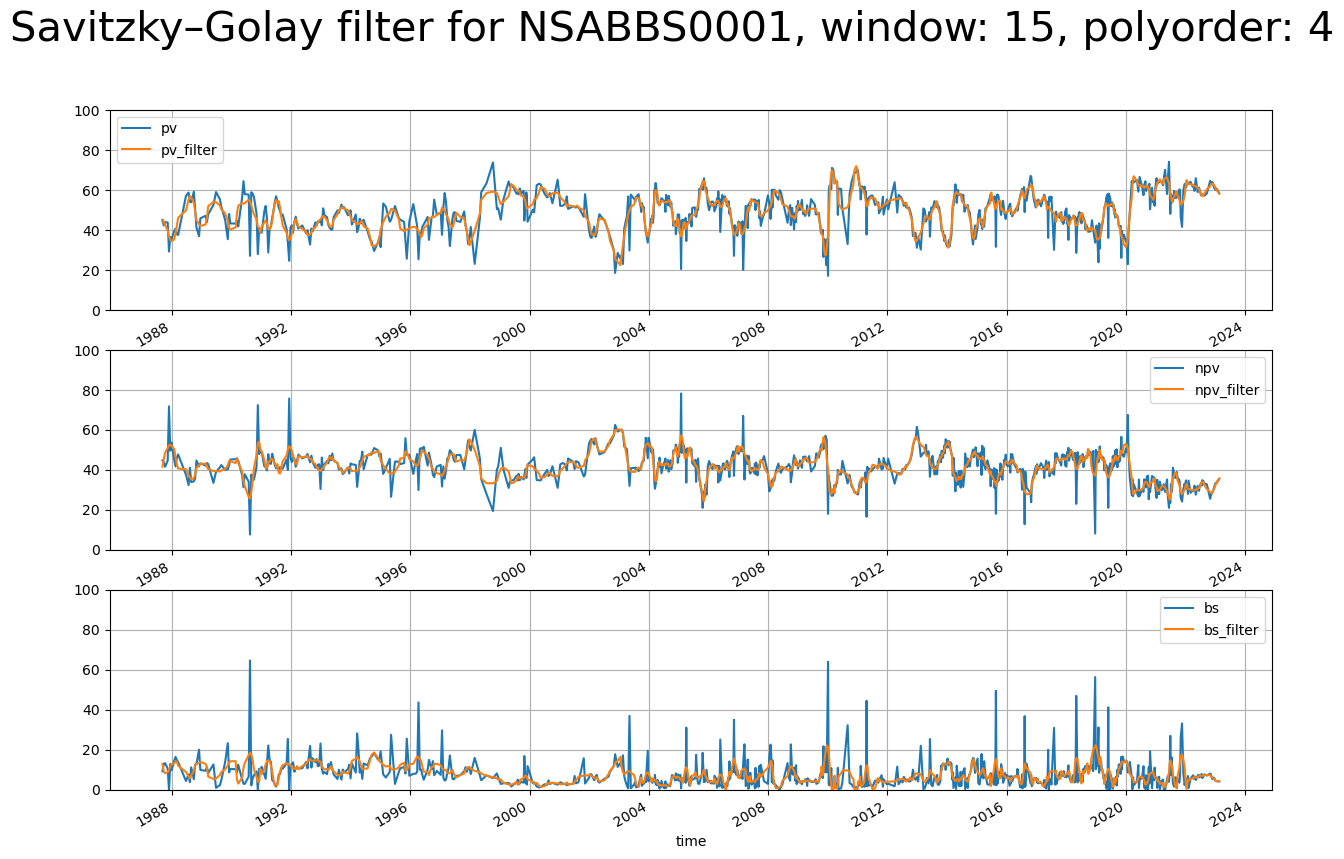

In [4]:
fig, ax = plt.subplots(nrows = 3, figsize = (15,10))
fig.suptitle(f'Savitzky–Golay filter for {site_choice}, window: {window_length_smooth}, polyorder: {polyorder}', fontsize=30)

for i, fract in enumerate(fractions):
    dea_fc_example.plot(y = fract, ax = ax[i])
    dea_fc_example.plot(y = fract + '_filter', ax = ax[i])
    ax[i].set_ylim(0, 100)
    ax[i].grid(True)
    
plt.show()
plt.close()

In [5]:
from docx import Document
from docx.shared import Inches

# Create a new Document
doc = Document()

# Add each plot to the document
max_counter = len(files)
for counter, site_choice in enumerate(files):  # Adjust the range for the number of plots you created
    print(f'Site: {site_choice} {counter + 1}/{max_counter}')
    
    dea_fc_example = pd.read_csv(f'../DATASETS/DEA_FC_PROCESSED/SPATIAL_AND_UE_FILTER/{site_choice + ".csv"}', usecols = ['time', 'pv', 'npv', 'bs'], parse_dates = ['time'])
    dea_fc_example = dea_fc_example.copy()
    dea_fc_example = dea_fc_example.sort_values(by = 'time')
    dea_fc_example.set_index('time', inplace=True)

    # Test the filters params 
    # savgol_filter parameters 
    window_length_smooth = 15
    polyorder = 4 

    fractions = ['pv', 'npv', 'bs']
    for f in fractions:
        variable_name = f + '_filter'
        dea_fc_example[variable_name] = savgol_filter(dea_fc_example[f], window_length = window_length_smooth, polyorder = polyorder)
        dea_fc_example.loc[dea_fc_example[variable_name] < 0, variable_name] = 0 # correct for any negative-valued fractions 
        
        
    fig, ax = plt.subplots(nrows = 3, figsize = (15,10))
    fig.suptitle(f'Savitzky–Golay filter for {site_choice}, window: {window_length_smooth}, polyorder: {polyorder}', fontsize=30)

    for i, fract in enumerate(fractions):
        dea_fc_example.plot(y = fract, ax = ax[i])
        dea_fc_example.plot(y = fract + '_filter', ax = ax[i])
        ax[i].set_ylim(0, 100)
        ax[i].grid(True)
    
    plt.savefig(fname = f'Temporary_PNG_Files/{site_choice}')
    plt.close()
    doc.add_heading(f'{site_choice}', level=1)
    doc.add_picture(f'Temporary_PNG_Files/{site_choice}.png', width=Inches(7))  
    doc.add_page_break() 
    
    doc.save('Savitzky–Golay_Filter_Test_Results.docx')

Site: NSABBS0001 1/735
Site: NSABBS0002 2/735
Site: NSABBS0003 3/735
Site: NSABBS0004 4/735
Site: NSABBS0005 5/735
Site: NSABBS0006 6/735
Site: NSABHC0001 7/735
Site: NSABHC0002 8/735
Site: NSABHC0003 9/735
Site: NSABHC0004 10/735
Site: NSABHC0005 11/735
Site: NSABHC0006 12/735
Site: NSABHC0007 13/735
Site: NSABHC0008 14/735
Site: NSABHC0009 15/735
Site: NSABHC0010 16/735
Site: NSABHC0011 17/735
Site: NSABHC0012 18/735
Site: NSABHC0013 19/735
Site: NSABHC0014 20/735
Site: NSABHC0015 21/735
Site: NSABHC0016 22/735
Site: NSABHC0017 23/735
Site: NSABHC0018 24/735
Site: NSABHC0019 25/735
Site: NSABHC0020 26/735
Site: NSABHC0021 27/735
Site: NSABHC0022 28/735
Site: NSABHC0023 29/735
Site: NSABHC0024 30/735
Site: NSABHC0025 31/735
Site: NSABHC0026 32/735
Site: NSABHC0028 33/735
Site: NSABHC0029 34/735
Site: NSACHC0001 35/735
Site: NSACHC0002 36/735
Site: NSACHC0003 37/735
Site: NSACHC0004 38/735
Site: NSACOP0001 39/735
Site: NSACOP0002 40/735
Site: NSAMDD0001 41/735
Site: NSAMDD0002 42/735
S